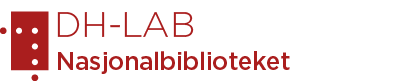

In [ ]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline
import dhlab.module_update as mu
import warnings
warnings.filterwarnings('ignore')
mu.css()

# Kollokasjoner eller assosiasjoner

I denne notebooken viser vi eksempler på undersøkelser man kan gjøre for å finne ut hvilke ord et ord opptrer sammen med innenfor et korpus.

## 1. Konstruer et korpus med Dewey

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for andre måter å definere korpus.

For å finne relevant dewey-klassifikasjon kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

In [ ]:
# korpus med inntil 200 bøker fra dewey 641.2 (drikkevarer) utgitt mellom 1960 og 2020

korpus = nb.book_urn(ddk='641.2%', period=(1960, 2020), limit=200)

Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.

In [ ]:
nb.frame(korpus).head(10)

## 2. Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### 2.1. Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [ ]:
collword = 'rødvin'

In [ ]:
# Vi utfører en konkordans for å sjekke at korpuset virker.

nb.urn_concordance(word = 'sei', urns = korpus, size = 5)

Så kan vi hente ut selve kollokasjonen, dvs. ord som står innenfor en viss avstand fra målordet.

In [ ]:
# Vi legger inn variablen collword som søkeord, med 5 ord før og etter. 
#  Antall ord før og etter kan endres etter konteksten man vil undersøke.
# Collword er lagt som variabel i cella over, slik at det er lett å gjenbruke notebooken for ulike søkeord

coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen ligger i en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [ ]:
coll.head(10)


### 2.2. Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### 2.2.1. Bokhylla aggregert

In [ ]:
tot = nb.frame(nb.totals(top = 50000))

In [ ]:
tot.head()

#### 2.2.2. Aggregert korpus

In [ ]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [ ]:
korpus_agg = nb.frame_sort(nb.frame(korpus_agg))

In [ ]:
korpus_agg.head(10)

### 2.3. Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [ ]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

Inspiser dataene etter normalisering

#### 2.3.1. Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [ ]:
korpus_agg.head()

#### 2.3.2. Bokhylla total

In [ ]:
tot.head()

#### 2.3.3. Kollokasjonen

In [ ]:
coll.head()

Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### 2.3.4. Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [ ]:
coll_assoc = nb.frame_sort(coll**1.0/tot)

In [ ]:
coll_assoc.head(20)

#### 2.3.5. Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [ ]:
coll_assoc_korp = nb.frame_sort(coll**1.2/korpus_agg)

In [ ]:
coll_assoc_korp.head(20)

# 3. Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

In [ ]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin i korpuset vårt, målt mot alle bøker i nb.no 

nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

In [ ]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin, målt mot hele "Drikkevare"-korpuset

nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## 4. Gjenbruk med andre ord og korpus

1. Bytt ut parametrene i cellen der `korpus` blir definert.
2. Bytt ut ordet som er angitt som `collword`.
3. Gå til `Cell` i menyen og velg `Run All`.

Det er også mulig å først velge `File` og `Make a Copy`, slik at man oppretter en ny notebook før man starter.